In [1]:
import os
print(os.getcwd())
import pandas as pd

import matplotlib.pyplot as plt

/root/download/stock-trend-classifier/utils


In [2]:
data = pd.read_csv("equity_indicators_202501192116.csv")

In [13]:
# data["rsi_1"].plot("pie")
# data.columns

Index(['report_date', 'ticker', 'rsi_1', 'rsi_2', 'rsi_3', 'rsi_4', 'rsi_5',
       'rsi_6', 'rsi_7', 'rsi_8', 'rsi_9', 'rsi_10', 'rsi_11', 'rsi_12',
       'rsi_13', 'rsi_14', 'rsi_15', 'rsi_16', 'rsi_17', 'rsi_18', 'rsi_19',
       'rsi_20', 'sma_10', 'sma_20', 'sma_50', 'sma_200', 'ema_10', 'ema_20',
       'ema_50', 'ema_200', 'macd_12_26_9_line', 'macd_12_26_9_signal',
       'macd_12_26_9_histogram', 'rv_10', 'rv_20', 'rv_30', 'rv_60', 'hls_10',
       'hls_20', 'obv'],
      dtype='object')

In [30]:
data.describe()

,rsi_1,rsi_2,rsi_3,rsi_4,rsi_5,rsi_6,rsi_7,rsi_8,rsi_9,rsi_10,...,macd_12_26_9_signal,macd_12_26_9_histogram,rv_10,rv_20,rv_30,rv_60,hls_10,hls_20,obv,obv_sta
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,...,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5033.000000
mean,52.304331,52.894049,53.308408,53.576928,53.769005,53.862087,53.962196,54.063821,54.142959,54.201368,...,0.155041,0.001058,38.852272,40.139239,40.693214,41.343616,1.732117,1.733171,2.040278e+10,-0.000557
std,49.951834,39.838496,34.044088,30.133303,27.521529,25.578258,24.017508,22.680560,21.459508,20.398460,...,0.839317,0.257400,26.336750,24.258316,23.308689,21.926391,0.949486,0.857979,1.156071e+10,0.127367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.794277,-1.943645,0.000000,0.000000,0.000000,0.000000,0.311932,0.437406,-1.293057e+09,-7.163677
25%,0.000000,7.287903,24.081475,28.949635,32.289919,34.285378,35.639404,36.833600,37.824883,38.776497,...,-0.028466,-0.039073,23.085897,25.048576,25.622804,26.386900,1.023844,1.041307,8.629511e+09,-0.006315
50%,100.000000,54.646449,54.532353,54.386175,54.586113,54.522358,54.333184,54.420420,54.192190,54.024462,...,0.035984,0.000896,33.309915,34.661927,35.899683,37.503857,1.511279,1.548300,2.404062e+10,0.001001
75%,100.000000,100.000000,84.735330,78.849896,75.898077,74.088254,72.855170,71.630385,70.520552,69.565358,...,0.347174,0.046612,48.007175,49.935282,49.859997,49.140680,2.201338,2.187722,3.203990e+10,0.006976
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,4.189596,1.277629,390.233670,276.646300,229.593700,169.482590,8.327092,5.521171,3.573403e+10,2.047341


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'your_dataset.csv' with the path to your dataset file
df = data.copy()

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Plot the distribution for all features
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
# data[["report_date", "obv"]].set_index("report_date").plot()
# data[["report_date", "obv_sta"]].set_index("report_date").plot()
data["obv_sta"] = data["obv"].pct_change()

def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound))]

data["obv_sta_no_out"] = remove_outliers(data["obv_sta"])



In [65]:
def volatility_adjustment(data, window=252):
    # Calculate rolling standard deviation
    rolling_std = data.rolling(window=window).std()
    # Adjust the series by dividing by its rolling std
    adjusted_series = data / rolling_std
    return adjusted_series

data["obv_sta_no_out_vol_adj"] = volatility_adjustment(data["obv_sta_no_out"])


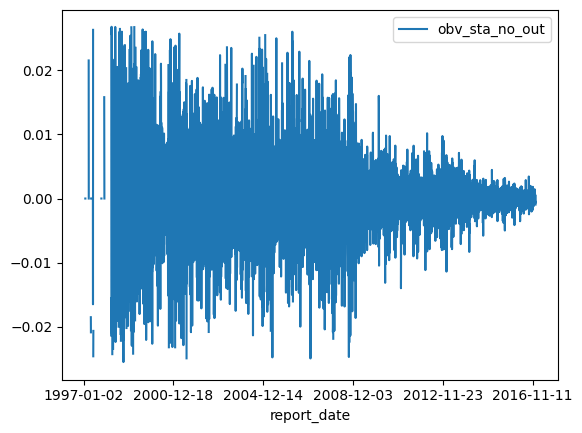

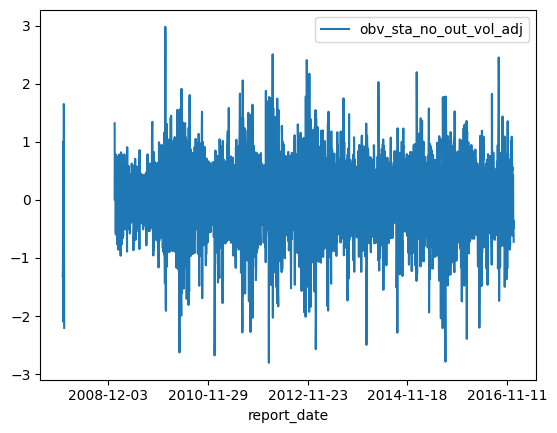

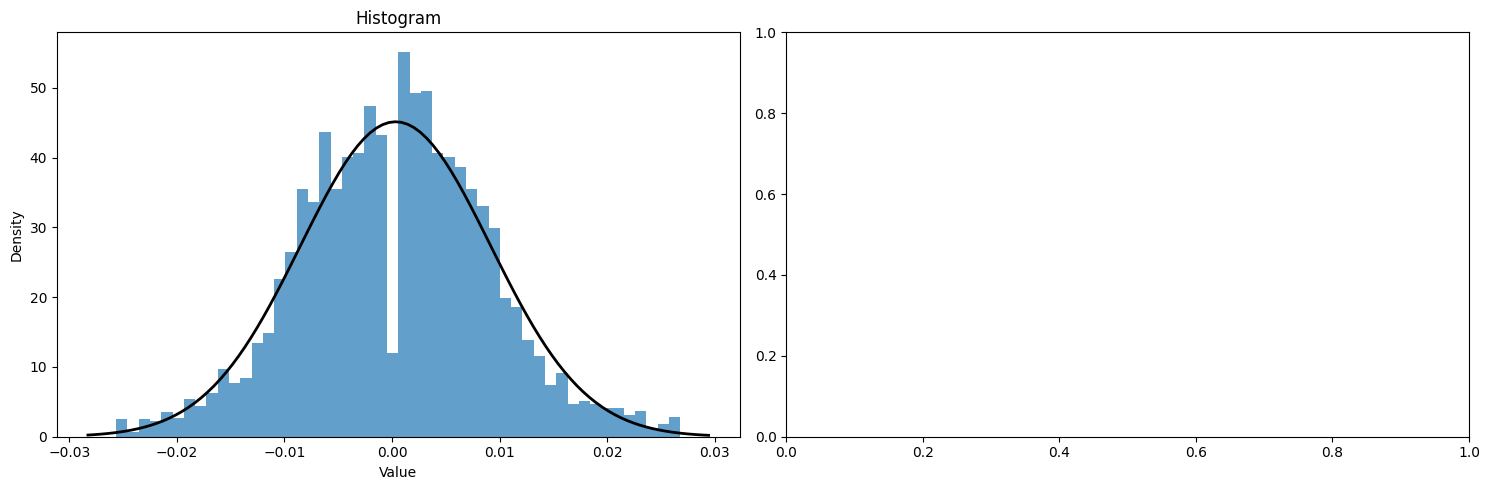

In [74]:
# data[["report_date", "obv"]].set_index("report_date").plot()
# data[["report_date", "obv_sta"]].set_index("report_date").plot()
data[["report_date", "obv_sta_no_out"]].set_index("report_date").plot()
data[["report_date", "obv_sta_no_out_vol_adj"]].set_index("report_date").plot()
# data[["report_date", "obv_sta"]].set_index("report_date").plot()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# Histogram
ax1.hist(data['obv_sta_no_out'], bins=50, density=True, alpha=0.7)
ax1.set_title('Histogram')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Add a normal distribution curve for comparison
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data['obv_sta_no_out']), np.std(data['obv_sta_no_out']))
ax1.plot(x, p, 'k', linewidth=2)

# # Q-Q plot
# stats.probplot(data['obv_sta_no_out_vol_adj'], dist="norm", plot=ax2)
# ax2.set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
data['rsi_14_centered'] = qt.fit_transform(data['obv_sta_no_out'].values.reshape(-1,1))

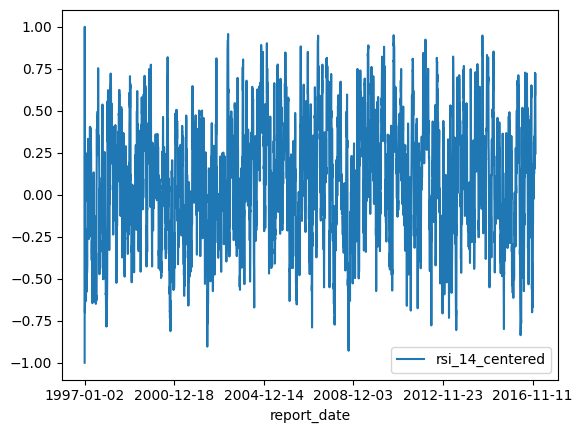

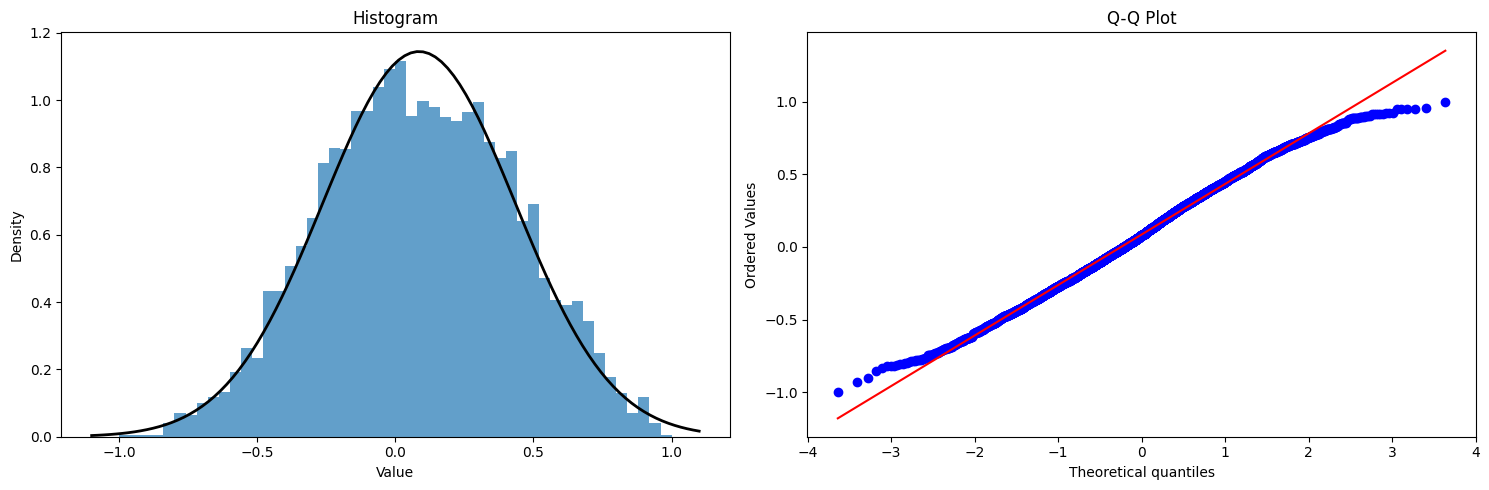

In [49]:
import scipy.stats as stats
import numpy as np

data['rsi_14_centered'] = (data['rsi_14'] - 50) / 50

data[["report_date", "rsi_14_centered"]].set_index("report_date").plot()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
ax1.hist(data['rsi_14_centered'], bins=50, density=True, alpha=0.7)
ax1.set_title('Histogram')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Add a normal distribution curve for comparison
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data['rsi_14_centered']), np.std(data['rsi_14_centered']))
ax1.plot(x, p, 'k', linewidth=2)

# Q-Q plot
stats.probplot(data['rsi_14_centered'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

<Axes: xlabel='report_date'>

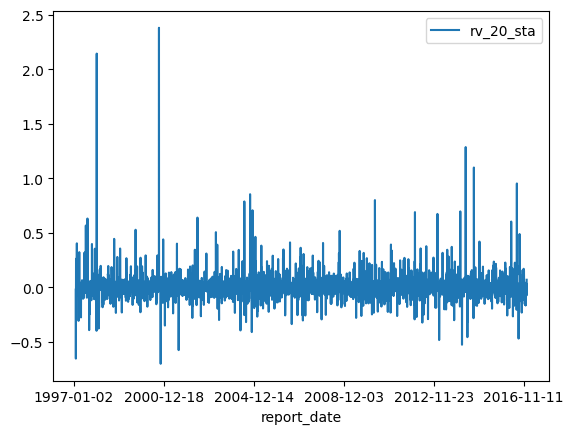

In [52]:
import numpy as np
import scipy.stats as stats

# Center around 50 (RSI's midpoint) and scale
# data['hls_20_centered'] = (data['hls_20'] - 50) / 50  # This will bound it roughly between -1 and 1
data["rv_20_sta"] = data["rv_20"].pct_change()
data[["report_date", "rv_20_sta"]].set_index("report_date").plot()

# # data["hls_20_sta_no_out"] = remove_outliers(data["hls_20_sta"])
# data['rv_10_normalized'] = 2 * (data['rv_10_sta'])

# data[["report_date", "rv_10_normalized"]].set_index("report_date").plot()

# # Create a figure with two subplots side by side
# fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))

# # Histogram
# ax1.hist(data['rv_10_normalized'], bins=50, density=True, alpha=0.7)
# ax1.set_title('Histogram')
# ax1.set_xlabel('Value')
# ax1.set_ylabel('Density')

# # Add a normal distribution curve for comparison
# xmin, xmax = ax1.get_xlim()
# x = np.linspace(xmin, xmax, 100)
# p = stats.norm.pdf(x, np.mean(data['rv_10_normalized']), np.std(data['rv_10_normalized']))
# ax1.plot(x, p, 'k', linewidth=2)

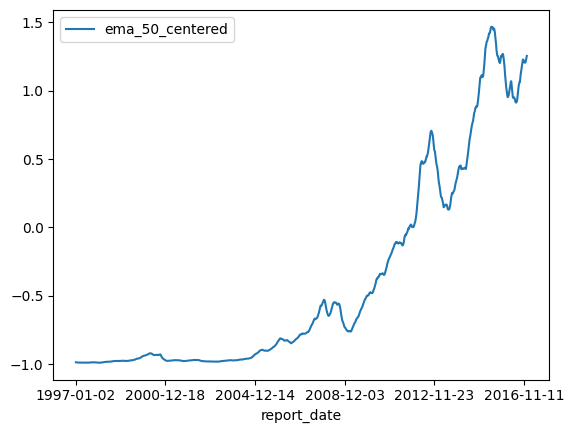

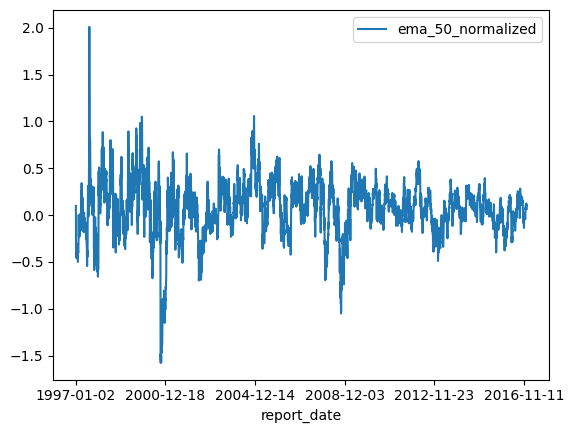

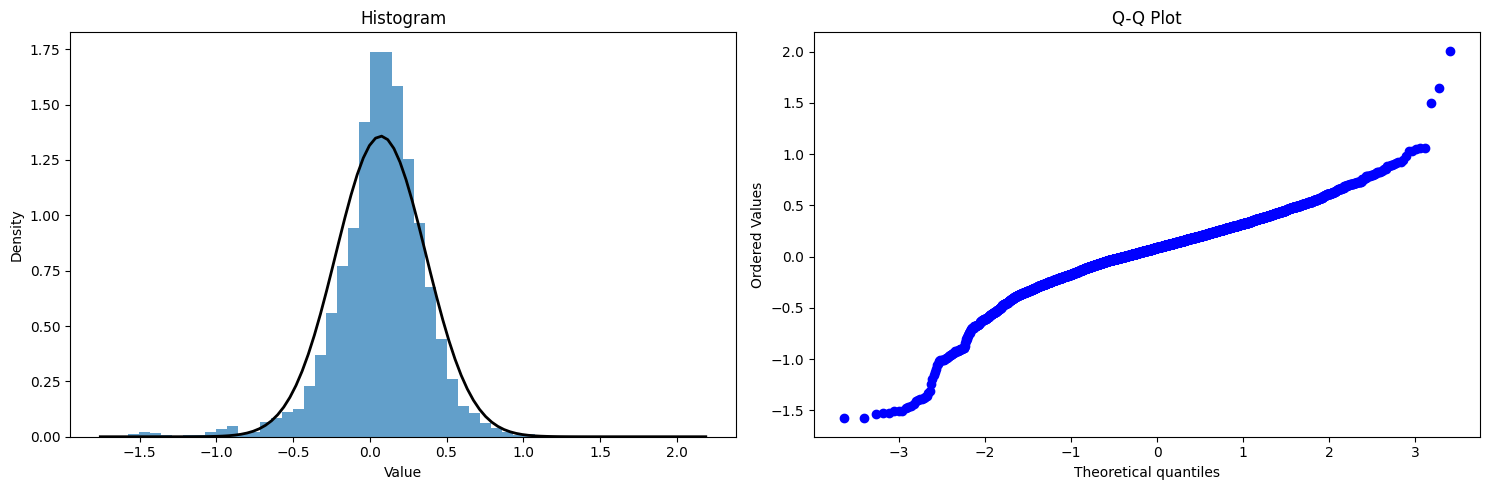

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# First apply log transformation (adding a small constant to handle zeros)
data["ema_50_sta"] = data["ema_50"].pct_change()
data[["report_date", "ema_50_sta"]].set_index("report_date").plot()

# data["sma_50_sta_no_out"] = remove_outliers(data["sma_50_sta"])

# Normalize to [-1, 1] range
# data['sma_20_normalized'] = 2 * (data['sma_20_sta'] - data['sma_20_sta'].min()) / (data['sma_20_sta'].max() - data['sma_20_sta'].min()) - 1
data['ema_50_normalized'] = 70 * (data['ema_50_sta'])

data[["report_date", "ema_50_normalized"]].set_index("report_date").plot()
# Plot to check the distribution
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
ax1.hist(data['ema_50_normalized'], bins=50, density=True, alpha=0.7)
ax1.set_title('Histogram')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Add normal distribution curve
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data['ema_50_normalized']), np.std(data['ema_50_normalized']))
ax1.plot(x, p, 'k', linewidth=2)

# Q-Q plot
stats.probplot(data['ema_50_normalized'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

/root/anaconda3/envs/stock_trading_system/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


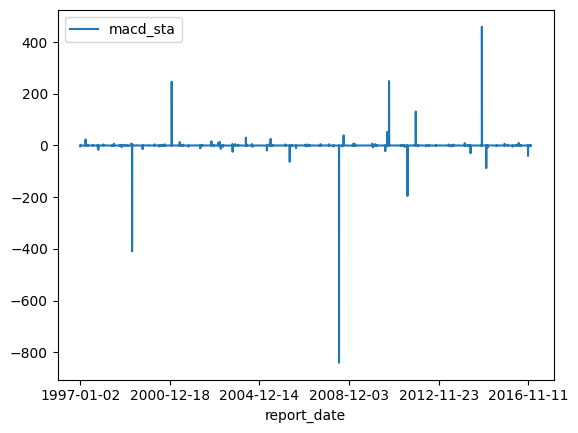

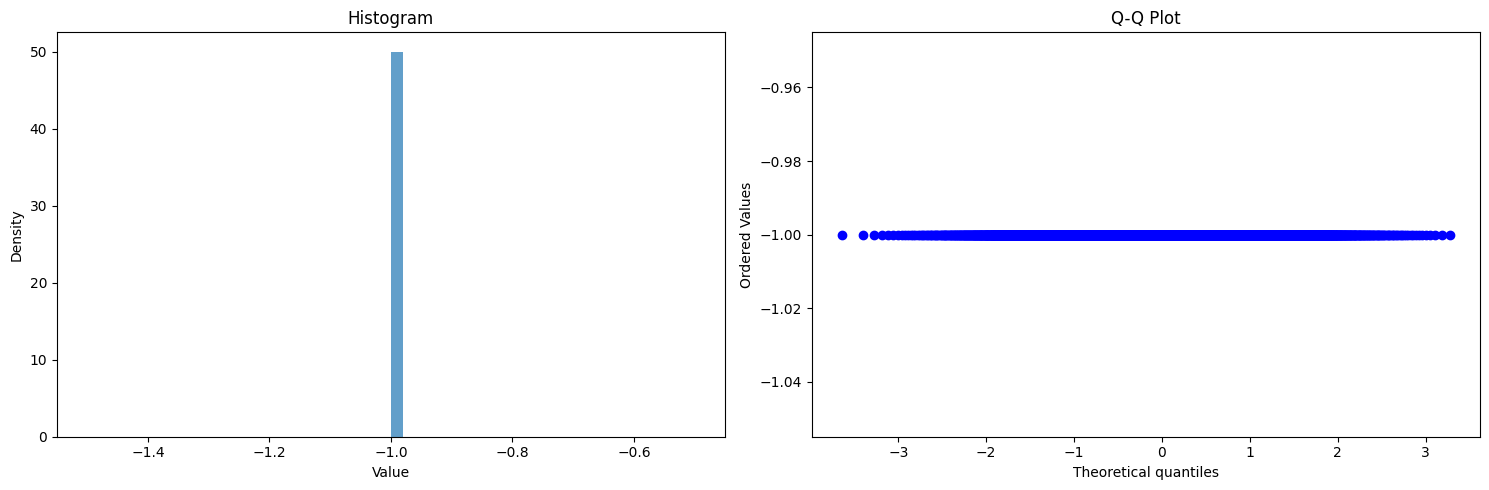

In [34]:

# data[["report_date", "macd_12_26_9_signal"]].set_index("report_date").plot()

# def scale_volatility_preserve_info(series, target_vol=1.0):
#     current_vol = series.std()
#     scaling_factor = target_vol / current_vol
#     return series * scaling_factor

# data['macd_scaled'] = scale_volatility_preserve_info(data['macd_12_26_9_line'])
# data[["report_date", "macd_scaled"]].set_index("report_date").plot()
# First apply log transformation (adding a small constant to handle zeros)
data["macd_sta"] = data["macd_12_26_9_signal"].pct_change()
# data["macd_sta_no_out"] = remove_outliers(data["macd_sta"])
data[["report_date", "macd_sta"]].set_index("report_date").plot()

# Normalize to [-1, 1] range
data['macd_normalized'] = 2 * (data['macd_sta'] - data['macd_sta'].min()) / (data['macd_sta'].max() - data['macd_sta'].min()) - 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
ax1.hist(data['macd_normalized'], bins=50, density=True, alpha=0.7)
ax1.set_title('Histogram')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Add normal distribution curve
xmin, xmax = ax1.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data['macd_normalized']), np.std(data['macd_normalized']))
ax1.plot(x, p, 'k', linewidth=2)

# Q-Q plot
stats.probplot(data['macd_normalized'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')

plt.tight_layout()
plt.show()


**TODO**

1. EDA, exploratory data analysis, distributions, min, max, range, outliers, missing values
2. Data preprocesing. demean, devariance, make it stationary, align dataset
3. Feature engineering
4. Input feature, train model

**Suggestions**

- `python -m venv .venv`, virtual environment
- vscode extension, `database notebook`, `sqlalchemy`